In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data.csv', encoding='utf-8')
data

,site,longitude,dimension
0,1,1150,1760
1,2,630,1660
2,3,40,2090
3,4,750,1100
4,5,750,2030
5,6,1030,2070
6,7,1650,650
7,8,1490,1630
8,9,790,2260
9,10,710,1310


In [3]:
data = data.iloc[:, 1:]
data = np.array(data)
data

array([[1150, 1760],
       [ 630, 1660],
       [  40, 2090],
       [ 750, 1100],
       [ 750, 2030],
       [1030, 2070],
       [1650,  650],
       [1490, 1630],
       [ 790, 2260],
       [ 710, 1310],
       [ 840,  550],
       [1170, 2300],
       [ 970, 1340],
       [ 510,  700],
       [ 750,  900],
       [1280, 1200],
       [ 230,  590],
       [ 460,  860],
       [1040,  950],
       [ 590, 1390],
       [ 830, 1770],
       [ 490,  500],
       [1840, 1240],
       [1260, 1500],
       [1280,  790],
       [ 490, 2130],
       [1460, 1420],
       [1260, 1910],
       [ 360, 1980]], dtype=int64)

In [4]:
class Greedy(object):
    def __init__(self, num_city, data):
        self.num_city = num_city
        self.location = data
        self.dis_mat = self.compute_dis_mat(num_city, data)

    # 计算不同城市之间的距离
    def compute_dis_mat(self, num_city, location):
        dis_mat = np.zeros((num_city, num_city))
        for i in range(num_city):
            for j in range(num_city):
                if i == j:
                    dis_mat[i][j] = np.inf
                    continue
                a = location[i]
                b = location[j]
                tmp = np.sqrt(sum([(x[0] - x[1]) ** 2 for x in zip(a, b)]))
                dis_mat[i][j] = tmp
        return dis_mat

    # 计算路径长度, goback:是否计算回到起始点的路径
    def compute_pathlen(self, path, dis_mat, goback=True):
        a = path[0]
        b = path[-1]
        if goback:
            result = dis_mat[a][b]
        else:
            result = 0.0
        for i in range(len(path) - 1):
            a = path[i]
            b = path[i + 1]
            result += dis_mat[a][b]
        return result

    # 贪心
    def run(self):
        restnum = [x for x in range(1, self.num_city)]
        tmppath = [0]
        tmplen = 0
        cnt = 0

        # print(self.dis_mat)
        while len(restnum) > 0:
            flag = 1
            cnt += 1
            print(f'第{cnt}次')
            c = restnum[0]
            restnum = restnum[1:]
            # print(restnum)
            
            # print(self.dis_mat[c])
            while flag:
                minpath = min(self.dis_mat[c])
                minpath_index = np.where(self.dis_mat[c]==minpath)
                a = list(minpath_index)[0]
                print(f'minpath_index:{minpath_index}')
                print(f'minpath:{minpath}')
                if a[0] in tmppath:
                    self.dis_mat[c][a[0]] = math.inf
                else:
                    flag = 0
                # print(self.dis_mat[c][minpath_index])
                # print(self.dis_mat[minpath_index][c])
                    print(f'最小值的索引为:{a}')
                
            tmppath.append(a[0])
            tmplen += minpath
            
            # print(self.dis_mat[a[0]][c])
            
            # self.dis_mat[a[0]][c] = math.inf
            
            # same = np.where(self.dis_mat==minpath)
            # print(f'same:{same}')
            # print(self.dis_mat[a[0]])
            # print(self.dis_mat[c][a])
            # t_path.append(minpath)
            print(f'tmplen:{tmplen}')
            
            if len(tmppath) <= 1:
                tmppath.append(c)
                # print(self.dis_mat)
                tmplen = self.compute_pathlen(tmppath, self.dis_mat)
                print(f'tmppath{tmppath}')
                print(f'tmplen:{tmplen}')
                continue
                
        # tmppath.append(0)
        tmplen += self.dis_mat[0][a[0]]
        # print(tmppath)
        # r = tmppath.copy()
        # r.sort()
        # print(r)
        return self.location[tmppath], tmplen


In [5]:
model = Greedy(num_city=data.shape[0], data=data.copy())
Best_path, Best = model.run()
print('规划的路径长度:{}'.format(Best))
print(Best_path)

第1次
minpath_index:(array([20], dtype=int64),)
minpath:228.25424421026653
最小值的索引为:[20]
tmplen:228.25424421026653
第2次
minpath_index:(array([28], dtype=int64),)
minpath:338.3784863137726
最小值的索引为:[28]
tmplen:566.6327305240392
第3次
minpath_index:(array([14], dtype=int64),)
minpath:200.0
最小值的索引为:[14]
tmplen:766.6327305240392
第4次
minpath_index:(array([8], dtype=int64),)
minpath:233.45235059857504
最小值的索引为:[8]
tmplen:1000.0850811226142
第5次
minpath_index:(array([11], dtype=int64),)
minpath:269.2582403567252
最小值的索引为:[11]
tmplen:1269.3433214793395
第6次
minpath_index:(array([24], dtype=int64),)
minpath:395.60080889704966
最小值的索引为:[24]
tmplen:1664.9441303763892
第7次
minpath_index:(array([26], dtype=int64),)
minpath:212.13203435596427
最小值的索引为:[26]
tmplen:1877.0761647323534
第8次
minpath_index:(array([4], dtype=int64),)
minpath:233.45235059857504
最小值的索引为:[4]
tmplen:2110.5285153309283
第9次
minpath_index:(array([19], dtype=int64),)
minpath:144.22205101855957
最小值的索引为:[19]
tmplen:2254.7505663494876
第10次
minpath_

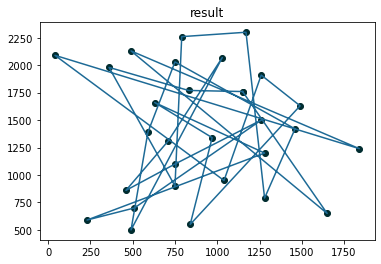

In [7]:
plt.scatter(Best_path[:, 0], Best_path[:, 1], color='#002C2F')
Best_path = np.vstack([Best_path, Best_path[0]])
plt.plot(Best_path[:, 0], Best_path[:, 1], '#1D6A96')
plt.title('result')
plt.savefig('./Greedy.png', dpi=600)
plt.show()

In [28]:
r = pd.DataFrame(columns=['longitude', 'dimension'], data=Best_path)
b = pd.Series({'Best': Best})
a = pd.concat([r, b], axis=1)
a.to_csv('Greedy.csv', encoding='utf-8', index=False)